## What is Maximum Likelihood Estimation? How is it related to cross-entropy loss?


### What is Maximum Likelihood Estimation (MLE)?

**Maximum Likelihood Estimation** is a method for estimating the parameters of a statistical model by finding the values that **maximise the likelihood** of observing the given data.

Formally, given:
- data points $ x_1, x_2, \ldots, x_n $
- a probability model $ p(x \mid \theta) $ parameterised by $\theta$

MLE finds the parameter $\theta^*$ that **maximises the likelihood function**:

$$\theta^* = \arg\max_{\theta} \prod_{i=1}^n p(x_i \mid \theta)$$

Since products of probabilities can be numerically unstable, we usually take the logarithm (log-likelihood):

$$\theta^* = \arg\max_{\theta} \sum_{i=1}^n \log p(x_i \mid \theta)$$

### What is Cross-Entropy Loss?

In machine learning, especially classification, **cross-entropy** measures the difference between two probability distributions:

- the **true distribution** $q(x)$ (e.g. a one-hot label),
- and the **predicted distribution** $p(x \mid \theta)$ from a model.

The cross-entropy is:

$$H(q, p) = - \sum_x q(x) \log p(x \mid \theta)$$

In supervised learning with known targets, this simplifies to:

$$\text{Loss} = - \sum_{i=1}^n \log p(x_i \mid \theta)$$

### Relationship between MLE and Cross-Entropy

They're essentially the **same objective** from two perspectives:

| Perspective         | Expression                        | Notes                         |
|---------------------|-----------------------------------|-------------------------------|
| **MLE**             | Maximise $\sum \log p(x_i \mid \theta)$ | Statistical modelling   |
| **Cross-Entropy**   | Minimise  $-\sum \log p(x_i \mid \theta)$ | Loss minimisation in ML |

**Minimising cross-entropy = maximising likelihood** 
    
This is why classifiers trained with cross-entropy (e.g. softmax output + CE loss) are performing MLE under the hood.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.optimize import minimize

In [2]:
# 1. Generate synthetic Weibull data (known parameters)
shape_true = 1.5   # k
scale_true = 2.0   # λ
data = weibull_min.rvs(c=shape_true, scale=scale_true, size=100)

In [3]:
# 2. Define the negative log-likelihood
def nll(params, data):
    shape, scale = params
    if shape <= 0 or scale <= 0:
        return np.inf
    return -np.sum(weibull_min.logpdf(data, c=shape, scale=scale))

In [4]:
# 3. Optimise using scipy
initial_guess = [1.0, 1.0]
result = minimize(nll, initial_guess, args=(data,), method='L-BFGS-B', bounds=[(1e-5, None), (1e-5, None)])
shape_mle, scale_mle = result.x

# 4. Compare with built-in scipy fit
shape_scipy, loc_scipy, scale_scipy = weibull_min.fit(data, floc=0)  # Fix loc=0 for fair comparison

print(f"True shape = {shape_true:.3f}, scale = {scale_true:.3f}")
print(f"Manual MLE = shape: {shape_mle:.3f}, scale: {scale_mle:.3f}")
print(f"scipy.fit = shape: {shape_scipy:.3f}, scale: {scale_scipy:.3f}")

True shape = 1.500, scale = 2.000
Manual MLE = shape: 1.395, scale: 1.833
scipy.fit = shape: 1.395, scale: 1.833


Text(0.5, 1.0, 'Weibull MLE via NLL (Cross-Entropy)')

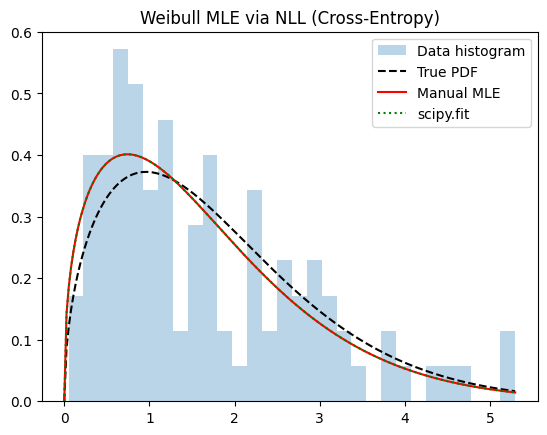

In [5]:
# 5. Plot histogram and fitted PDFs
x = np.linspace(0, np.max(data), 200)
pdf_true   = weibull_min.pdf(x, c=shape_true, scale=scale_true)
pdf_manual = weibull_min.pdf(x, c=shape_mle, scale=scale_mle)
pdf_scipy  = weibull_min.pdf(x, c=shape_scipy, scale=scale_scipy)

plt.hist(data, bins=30, density=True, alpha=0.3, label="Data histogram")
plt.plot(x, pdf_true,   'k--', label='True PDF')
plt.plot(x, pdf_manual, 'r-',  label='Manual MLE')
plt.plot(x, pdf_scipy,  'g:',  label='scipy.fit')
plt.legend()
plt.title("Weibull MLE via NLL (Cross-Entropy)")